# Bibliotecas usadas

In [1]:
import pandas as pd
import numpy as np
import sweetviz as sv
import pickle as pkl

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay

c:\Users\rober\programming\artificial_intelligence\ai_class\data\utilities\anomaly_detection_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Carregamento da base pré-preprocessada

In [2]:
df = pkl.load(open("../data/files/Normalized_Data.pkl", "rb"))

# Separação da base em treino e teste (80% x 20%)

In [3]:
X = df.drop(columns = ["attack_cat", "Label"])
y = df[["attack_cat", "Label"]]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [5]:
del df, X, y

# Seleção de características para classificação binária

## A seleção de características se dará com base na média da importância das características dos modelos Adaptive Boosting, Gradient Boosting e Random Forest

## Adaboost

In [41]:
ada_boost = AdaBoostClassifier(algorithm = "SAMME", random_state = 42)

ada_boost.fit(X_train, y_train["Label"])

AdaBoostClassifier(algorithm='SAMME', random_state=42)

In [42]:
y_predicted = ada_boost.predict(X_test)

train_accuracy = ada_boost.score(X_train, y_train["Label"])
test_accuracy = accuracy_score(y_test["Label"], y_predicted)
test_balanced_accuracy = balanced_accuracy_score(y_test["Label"], y_predicted)

print(f"Acurácia no treino {train_accuracy} \nAcurácia no teste: {test_accuracy} \nAcurácia balanceada no teste: {test_balanced_accuracy}")

Acurácia no treino 0.9899182425427487 
Acurácia no teste: 0.9896930594684484 
Acurácia balanceada no teste: 0.9784115951926249


In [43]:
feature_importance_ada_boost = pd.DataFrame({"Feature": ada_boost.feature_names_in_, 
                                             "Feature_Importance": ada_boost.feature_importances_})

## Gradient Boosting

In [45]:
gradient_boosting = GradientBoostingClassifier(random_state = 42)

gradient_boosting.fit(X_train, y_train["Label"])

GradientBoostingClassifier(random_state=42)

In [46]:
y_predicted = gradient_boosting.predict(X_test)

train_accuracy = gradient_boosting.score(X_train, y_train["Label"])
test_accuracy = accuracy_score(y_test["Label"], y_predicted)
test_balanced_accuracy = balanced_accuracy_score(y_test["Label"], y_predicted)

print(f"Acurácia no treino {train_accuracy} \nAcurácia no teste: {test_accuracy} \nAcurácia balanceada no teste: {test_balanced_accuracy}")

Acurácia no treino 0.9926688626133515 
Acurácia no teste: 0.9924394772357558 
Acurácia balanceada no teste: 0.9835877371034568


In [47]:
feature_importance_gradient_boosting = pd.DataFrame({"Feature": gradient_boosting.feature_names_in_,
                                                     "Feature_Importance": gradient_boosting.feature_importances_})

## Random Forest

In [48]:
random_forest = RandomForestClassifier(random_state = 42)

random_forest.fit(X_train, y_train["Label"])

RandomForestClassifier(random_state=42)

In [49]:
y_predicted = random_forest.predict(X_test)

train_accuracy = random_forest.score(X_train, y_train["Label"])
test_accuracy = accuracy_score(y_test["Label"], y_predicted)
test_balanced_accuracy = balanced_accuracy_score(y_test["Label"], y_predicted)

print(f"Acurácia no treino {train_accuracy} \nAcurácia no teste: {test_accuracy} \nAcurácia balanceada no teste: {test_balanced_accuracy}")

Acurácia no treino 0.9999989501450112 
Acurácia no teste: 0.9961433617476287 
Acurácia balanceada no teste: 0.9909995206423241


In [50]:
feature_importance_random_forest = pd.DataFrame({"Feature": random_forest.feature_names_in_, 
                                                 "Feature_Importance": random_forest.feature_importances_})

## Média das importâncias das características

### Características mais importantes: dstip, ct_state_ttl, ct_dst_sport_ltm, sttl, dsport e sbytes

In [68]:
df_feature_importance = pd.concat([feature_importance_ada_boost, feature_importance_gradient_boosting, feature_importance_random_forest], axis = 1)
df_feature_importance.columns = ["Feature", "Feature_Importance_Ada_Boost", 
                                 "Feature", "Feature_Importance_Gradient_Boosting",
                                 "Feature", "Feature_Importance_Random_Forest"]

df_feature_importance = df_feature_importance.iloc[:, [0, 1, 3, 5]]

df_feature_importance["Mean"] = df_feature_importance.iloc[:, [1, 2, 3]].mean(axis = 1)

df_feature_importance.sort_values(by = "Mean", ascending = False)

,Feature,Feature_Importance_Ada_Boost,Feature_Importance_Gradient_Boosting,Feature_Importance_Random_Forest,Mean
2,dstip,0.125444,7.648476e-01,0.131987,0.340759
36,ct_state_ttl,0.035253,1.519812e-01,0.170776,0.119337
7,sbytes,0.122702,2.474145e-03,0.103436,0.076204
3,dsport,0.196853,1.482632e-02,0.012410,0.074696
1,sport,0.190642,2.719971e-03,0.013567,0.068976
9,sttl,0.048663,2.095638e-03,0.121960,0.057573
41,ct_srv_dst,0.098012,9.096191e-03,0.020356,0.042488
8,dbytes,0.071094,7.400166e-03,0.023528,0.034008
22,smeansz,0.000000,7.485812e-03,0.050762,0.019416
13,service,0.037726,5.005015e-03,0.015269,0.019333


# Seleção de características para classificação multiclasse

## A seleção de características se dará com base na média da importância das características dos modelos Adaptive Boosting, Gradient Boosting e Random Forest

## Adaboost

In [38]:
ada_boost = AdaBoostClassifier(algorithm = "SAMME", random_state = 42)

ada_boost.fit(X_train, y_train["attack_cat"])

AdaBoostClassifier(algorithm='SAMME', random_state=42)

In [39]:
y_predicted = ada_boost.predict(X_test)

train_accuracy = ada_boost.score(X_train, y_train["attack_cat"])
test_accuracy = accuracy_score(y_test["attack_cat"], y_predicted)
test_balanced_accuracy = balanced_accuracy_score(y_test["attack_cat"], y_predicted)

print(f"Acurácia no treino {train_accuracy} \nAcurácia no teste: {test_accuracy} \nAcurácia balanceada no teste: {test_balanced_accuracy}")

Acurácia no treino 0.9683788650446081 
Acurácia no teste: 0.967982724647495 
Acurácia balanceada no teste: 0.4412057679531145


In [40]:
feature_importance_ada_boost = pd.DataFrame({"Feature": ada_boost.feature_names_in_, 
                                             "Feature_Importance": ada_boost.feature_importances_})

## Gradient Boosting

In [ ]:
gradient_boosting = GradientBoostingClassifier(random_state = 42)

gradient_boosting.fit(X_train, y_train["attack_cat"])

In [ ]:
y_predicted = gradient_boosting.predict(X_test)

train_accuracy = gradient_boosting.score(X_train, y_train["attack_cat"])
test_accuracy = accuracy_score(y_test["attack_cat"], y_predicted)
test_balanced_accuracy = balanced_accuracy_score(y_test["attack_cat"], y_predicted)

print(f"Acurácia no treino {train_accuracy} \nAcurácia no teste: {test_accuracy} \nAcurácia balanceada no teste: {test_balanced_accuracy}")

In [ ]:
feature_importance_gradient_boosting = pd.DataFrame({"Feature": gradient_boosting.feature_names_in_,
                                                     "Feature_Importance": gradient_boosting.feature_importances_})

## Random Forest

In [41]:
random_forest = RandomForestClassifier(random_state = 42)

random_forest.fit(X_train, y_train["attack_cat"])

RandomForestClassifier(random_state=42)

In [42]:
y_predicted = random_forest.predict(X_test)

train_accuracy = random_forest.score(X_train, y_train["attack_cat"])
test_accuracy = accuracy_score(y_test["attack_cat"], y_predicted)
test_balanced_accuracy = balanced_accuracy_score(y_test["attack_cat"], y_predicted)

print(f"Acurácia no treino {train_accuracy} \nAcurácia no teste: {test_accuracy} \nAcurácia balanceada no teste: {test_balanced_accuracy}")

Acurácia no treino 0.9911369287908084 
Acurácia no teste: 0.983435267624265 
Acurácia balanceada no teste: 0.570729716778857


In [43]:
feature_importance_random_forest = pd.DataFrame({"Feature": random_forest.feature_names_in_, 
                                                 "Feature_Importance": random_forest.feature_importances_})

## Média das importâncias das características

### Características mais importantes: dstip, ct_state_ttl, ct_dst_sport_ltm, sttl, dsport e sbytes

In [44]:
df_feature_importance = pd.concat([feature_importance_ada_boost, feature_importance_random_forest], axis = 1)
df_feature_importance.columns = ["Feature", "Feature_Importance_Ada_Boost", 
                                 "Feature", "Feature_Importance_Random_Forest"]

df_feature_importance = df_feature_importance.iloc[:, [0, 1, 3]]

df_feature_importance["Mean"] = df_feature_importance.iloc[:, [1, 2]].mean(axis = 1)

df_feature_importance.sort_values(by = "Mean", ascending = False)

,Feature,Feature_Importance_Ada_Boost,Feature_Importance_Random_Forest,Mean
2,dstip,0.132337,0.129689,0.131013
1,sport,0.228577,0.015328,0.121952
7,sbytes,0.105115,0.122001,0.113558
3,dsport,0.194074,0.012627,0.103351
36,ct_state_ttl,0.035023,0.142752,0.088888
9,sttl,0.058271,0.111799,0.085035
41,ct_srv_dst,0.100824,0.018871,0.059847
8,dbytes,0.055250,0.024783,0.040017
22,smeansz,0.015000,0.056262,0.035631
0,srcip,0.000000,0.050175,0.025087


# Execução dos modelos escolhidos | Classificação binária

## Separa-se o conjunto de dados com as características mais importantes

In [7]:
X_train_binary = X_train[["dstip", "ct_state_ttl", "ct_dst_sport_ltm", "sttl", "dsport", "sbytes"]]
X_test_binary = X_test[["dstip", "ct_state_ttl", "ct_dst_sport_ltm", "sttl", "dsport", "sbytes"]]

## Multilayer Perceptron

In [8]:
mlp = MLPClassifier(random_state = 42)

mlp.fit(X_train_binary, y_train["Label"])
y_predicted = mlp.predict(X_test_binary)

train_accuracy = mlp.score(X_train_binary, y_train["Label"])
test_accuracy = accuracy_score(y_test["Label"], y_predicted)
test_balanced_accuracy = balanced_accuracy_score(y_test["Label"], y_predicted)

print(f"Acurácia no treino {train_accuracy} \nAcurácia no teste: {test_accuracy} \nAcurácia balanceada no teste: {test_balanced_accuracy}")

Acurácia no treino 0.9869170045476758 
Acurácia no teste: 0.9866871913182299 
Acurácia balanceada no teste: 0.9892654156603095


## Adaboost

In [9]:
ada_boost = AdaBoostClassifier(algorithm = "SAMME", random_state = 42)

ada_boost.fit(X_train_binary, y_train["Label"])

AdaBoostClassifier(algorithm='SAMME', random_state=42)

In [10]:
y_predicted = ada_boost.predict(X_test_binary)

train_accuracy = ada_boost.score(X_train_binary, y_train["Label"])
test_accuracy = accuracy_score(y_test["Label"], y_predicted)
test_balanced_accuracy = balanced_accuracy_score(y_test["Label"], y_predicted)

print(f"Acurácia no treino {train_accuracy} \nAcurácia no teste: {test_accuracy} \nAcurácia balanceada no teste: {test_balanced_accuracy}")

Acurácia no treino 0.9858717428459366 
Acurácia no teste: 0.9856557094685703 
Acurácia balanceada no teste: 0.9809358179511105


In [11]:
feature_importance_ada_boost = pd.DataFrame({"Feature": ada_boost.feature_names_in_, 
                                             "Feature_Importance": ada_boost.feature_importances_})

## Gradient Boosting

In [12]:
gradient_boosting = GradientBoostingClassifier(random_state = 42)

gradient_boosting.fit(X_train_binary, y_train["Label"])

GradientBoostingClassifier(random_state=42)

In [13]:
y_predicted = gradient_boosting.predict(X_test_binary)

train_accuracy = gradient_boosting.score(X_train_binary, y_train["Label"])
test_accuracy = accuracy_score(y_test["Label"], y_predicted)
test_balanced_accuracy = balanced_accuracy_score(y_test["Label"], y_predicted)

print(f"Acurácia no treino {train_accuracy} \nAcurácia no teste: {test_accuracy} \nAcurácia balanceada no teste: {test_balanced_accuracy}")

Acurácia no treino 0.98900900430949 
Acurácia no teste: 0.9889332233610955 
Acurácia balanceada no teste: 0.9872371120283492


In [14]:
feature_importance_gradient_boosting = pd.DataFrame({"Feature": gradient_boosting.feature_names_in_,
                                                     "Feature_Importance": gradient_boosting.feature_importances_})

## Random Forest

In [15]:
random_forest = RandomForestClassifier(random_state = 42)

random_forest.fit(X_train_binary, y_train["Label"])

RandomForestClassifier(random_state=42)

In [16]:
y_predicted = random_forest.predict(X_test_binary)

train_accuracy = random_forest.score(X_train_binary, y_train["Label"])
test_accuracy = accuracy_score(y_test["Label"], y_predicted)
test_balanced_accuracy = balanced_accuracy_score(y_test["Label"], y_predicted)

print(f"Acurácia no treino {train_accuracy} \nAcurácia no teste: {test_accuracy} \nAcurácia balanceada no teste: {test_balanced_accuracy}")

Acurácia no treino 0.9924277580957339 
Acurácia no teste: 0.9915709822896142 
Acurácia balanceada no teste: 0.9846211856219096


# Execução dos modelos escolhidos | Classificação multiclasse

## Separa-se o conjunto de dados com as características mais importantes

In [6]:
X_train_multiclass = X_train[["dstip", "ct_state_ttl", "sport", "sttl", "dsport", "sbytes"]]
X_test_multiclass = X_test[["dstip", "ct_state_ttl", "sport", "sttl", "dsport", "sbytes"]]

## Multilayer Perceptron

In [7]:
mlp = MLPClassifier(random_state = 42)

mlp.fit(X_train_multiclass, y_train["attack_cat"])
y_predicted = mlp.predict(X_test_multiclass)

train_accuracy = mlp.score(X_train_multiclass, y_train["attack_cat"])
test_accuracy = accuracy_score(y_test["attack_cat"], y_predicted)
test_balanced_accuracy = balanced_accuracy_score(y_test["attack_cat"], y_predicted)

print(f"Acurácia no treino {train_accuracy} \nAcurácia no teste: {test_accuracy} \nAcurácia balanceada no teste: {test_balanced_accuracy}")

Acurácia no treino 0.9680279838801354 
Acurácia no teste: 0.9678449312706321 
Acurácia balanceada no teste: 0.28482442549587417


AttributeError: 'function' object has no attribute 'shape'

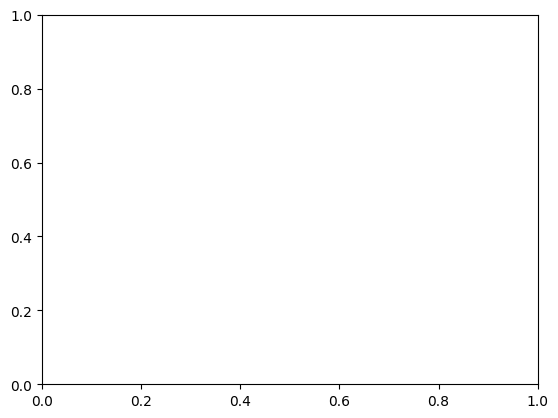

In [8]:
confusion_matrix_array = confusion_matrix(y_test["attack_cat"], y_predicted)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = mlp.classes_).plot()

## Adaboost

In [ ]:
ada_boost = AdaBoostClassifier(algorithm = "SAMME", random_state = 42)

ada_boost.fit(X_train_multiclass, y_train["attack_cat"])

AdaBoostClassifier(algorithm='SAMME', random_state=42)

In [ ]:
y_predicted = ada_boost.predict(X_test_multiclass)

train_accuracy = ada_boost.score(X_train_multiclass, y_train["attack_cat"])
test_accuracy = accuracy_score(y_test["attack_cat"], y_predicted)
test_balanced_accuracy = balanced_accuracy_score(y_test["attack_cat"], y_predicted)

print(f"Acurácia no treino {train_accuracy} \nAcurácia no teste: {test_accuracy} \nAcurácia balanceada no teste: {test_balanced_accuracy}")

Acurácia no treino 0.9643931896574209 
Acurácia no teste: 0.9641186046648963 
Acurácia balanceada no teste: 0.3422612290221546


In [ ]:
confusion_matrix_array = confusion_matrix(y_test["attack_cat"], y_predicted)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ada_boost.classes_).plot()

TypeError: 'numpy.ndarray' object is not callable

## Gradient Boosting

In [ ]:
gradient_boosting = GradientBoostingClassifier(random_state = 42)

gradient_boosting.fit(X_train_multiclass, y_train["attack_cat"])

In [ ]:
y_predicted = gradient_boosting.predict(X_test_multiclass)

train_accuracy = gradient_boosting.score(X_train_multiclass, y_train["attack_cat"])
test_accuracy = accuracy_score(y_test["attack_cat"], y_predicted)
test_balanced_accuracy = balanced_accuracy_score(y_test["attack_cat"], y_predicted)

print(f"Acurácia no treino {train_accuracy} \nAcurácia no teste: {test_accuracy} \nAcurácia balanceada no teste: {test_balanced_accuracy}")

## XGBoosting

In [ ]:
dtrain = xgb.DMatrix(X_train_multiclass, label = y_train["attack_cat"])

model 



## Random Forest

In [ ]:
random_forest = RandomForestClassifier(random_state = 42)

random_forest.fit(X_train_multiclass, y_train["attack_cat"])

RandomForestClassifier(random_state=42)

In [ ]:
y_predicted = random_forest.predict(X_test_multiclass)

train_accuracy = random_forest.score(X_train_multiclass, y_train["attack_cat"])
test_accuracy = accuracy_score(y_test["attack_cat"], y_predicted)
test_balanced_accuracy = balanced_accuracy_score(y_test["attack_cat"], y_predicted)

print(f"Acurácia no treino {train_accuracy} \nAcurácia no teste: {test_accuracy} \nAcurácia balanceada no teste: {test_balanced_accuracy}")

Acurácia no treino 0.9883722017473193 
Acurácia no teste: 0.9795042194300472 
Acurácia balanceada no teste: 0.5454004862660302


In [ ]:
confusion_matrix_array = confusion_matrix(y_test["attack_cat"], y_predicted)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = random_forest.classes_).plot()

TypeError: 'numpy.ndarray' object is not callable